<a href="https://colab.research.google.com/github/inathanms/Evolucao_Software_2025-2_goose/blob/main/Evolucao_Software_2025_2_goose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Fetch the last 100 closed pull request comments from the "block/goose" GitHub repository using the GitHub API, excluding bot comments. Map the following acronyms in the comments to their full forms: WIP -> Work In Progress, LGTM -> Looks Good To Me, PR -> Pull Request, MR -> Merge Request, IMO -> In My Opinion, IMHO -> In My Humble Opinion, AFAIK -> As Far As I Know, FYI -> For Your Information, Nit -> Nitpick, TL;DR -> Too Long; Didn't Read, TBD -> To Be Defined / To Be Determined, ACK -> Acknowledge, PTAL -> Please Take Another Look. Display the resulting list of comments.

## Set up github api access

### Subtask:
Obtain a GitHub personal access token with the necessary permissions to read repository data.


## Fetch closed pull requests

### Subtask:
Use the GitHub API to retrieve the last 100 closed pull requests for the `block/goose` repository.


**Reasoning**:
Import the necessary library and set up the API request to fetch the last 100 closed pull requests.



In [2]:
import requests
from google.colab import userdata

# Define the repository details
repo_owner = "block"
repo_name = "goose"

# GitHub API endpoint for pull requests
api_url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/pulls"

# Get GitHub token from environment variable
github_token = userdata.get("GITHUB_ACCESS_TOKEN")

# Set up the request parameters
params = {
    "state": "closed",
    "per_page": 100,
    "sort": "created",
    "direction": "desc"
}

# Set up the request headers with authentication
headers = {
    "Authorization": f"token {github_token}",
    "Accept": "application/vnd.github.v3+json"
}

# Make the GET request to the GitHub API
response = requests.get(api_url, params=params, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    closed_pull_requests = response.json()
    print(f"Successfully retrieved {len(closed_pull_requests)} closed pull requests.")
else:
    print(f"Error: {response.status_code} - {response.text}")
    closed_pull_requests = []
closed_pull_requests

Successfully retrieved 100 closed pull requests.


[{'url': 'https://api.github.com/repos/block/goose/pulls/5401',
  'id': 2952685189,
  'node_id': 'PR_kwDOMneZ986v_maF',
  'html_url': 'https://github.com/block/goose/pull/5401',
  'diff_url': 'https://github.com/block/goose/pull/5401.diff',
  'patch_url': 'https://github.com/block/goose/pull/5401.patch',
  'issue_url': 'https://api.github.com/repos/block/goose/issues/5401',
  'number': 5401,
  'state': 'closed',
  'locked': False,
  'title': 'fix: restore --resume functionality for most recent session',
  'user': {'login': 'wpfleger96',
   'id': 15384764,
   'node_id': 'MDQ6VXNlcjE1Mzg0NzY0',
   'avatar_url': 'https://avatars.githubusercontent.com/u/15384764?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/wpfleger96',
   'html_url': 'https://github.com/wpfleger96',
   'followers_url': 'https://api.github.com/users/wpfleger96/followers',
   'following_url': 'https://api.github.com/users/wpfleger96/following{/other_user}',
   'gists_url': 'https://api.github.com/users

## Fetch comments for each pr

### Subtask:
For each retrieved pull request, fetch its comments using the GitHub API.


**Reasoning**:
Iterate through the retrieved pull requests and fetch comments for each using the provided comments URL in the pull request object.



In [3]:
all_comments = []

if closed_pull_requests:
    for pr in closed_pull_requests:
        # Fetch regular comments
        comments_url = pr["_links"]["comments"]["href"]
        comments_response = requests.get(comments_url, headers=headers)

        if comments_response.status_code == 200:
            all_comments.extend(comments_response.json())
        else:
            print(f"Error fetching comments for PR {pr['number']}: {comments_response.status_code} - {comments_response.text}")

        # Fetch review comments
        review_comments_url = pr["_links"]["review_comments"]["href"]
        review_comments_response = requests.get(review_comments_url, headers=headers)

        if review_comments_response.status_code == 200:
            all_comments.extend(review_comments_response.json())
        else:
            print(f"Error fetching review comments for PR {pr['number']}: {review_comments_response.status_code} - {review_comments_response.text}")
else:
    print("No closed pull requests were retrieved in the previous step.")

## Filter out bot comments

### Subtask:
Identify and remove comments made by bots.

**Reasoning**:
Iterate through the fetched comments and exclude those where the `type` of the author is 'Bot'.

In [4]:
human_comments = [comment for comment in all_comments if comment['user']['type'] != 'Bot']

print(f"Filtered out {len(all_comments) - len(human_comments)} bot comments.")

Filtered out 61 bot comments.


## Extract and store comments

### Subtask:
Collect the text of the remaining comments into a list.

**Reasoning**:
Iterate through the filtered comments and extract the `body` (the comment text) from each comment object.

In [5]:
comment_texts = [comment['body'] for comment in human_comments]

print(f"Extracted {len(comment_texts)} human comments.")

Extracted 316 human comments.


## Map acronyms

### Subtask:
Replace the specified acronyms in the collected comments with their full forms.

**Reasoning**:
Iterate through the extracted comment texts and use string replacement to substitute the acronyms with their corresponding full forms.

In [6]:
acronym_map = {
    "WIP": "Work In Progress",
    "LGTM": "Looks Good To Me",
    "PR": "Pull Request",
    "MR": "Merge Request",
    "IMO": "In My Opinion",
    "IMHO": "In My Humble Opinion",
    "AFAIK": "As Far As I Know",
    "FYI": "For Your Information",
    "Nit": "Nitpick",
    "TL;DR": "Too Long; Didn't Read",
    "TBD": "To Be Defined / To Be Determined",
    "ACK": "Acknowledge",
    "PTAL": "Please Take Another Look"
}

mapped_comments = []
for comment in comment_texts:
    mapped_comment = comment
    for acronym, full_form in acronym_map.items():
        # Use regex to replace whole words only to avoid replacing parts of other words
        import re
        mapped_comment = re.sub(r'\b' + re.escape(acronym) + r'\b', full_form, mapped_comment, flags=re.IGNORECASE)
    mapped_comments.append(mapped_comment)

print("Mapped acronyms in comments.")

Mapped acronyms in comments.


In [18]:
# Truncate comments to a maximum length that the model can handle
# The error message suggests a limit around 512 characters, but the specific model might have a slightly different limit.
# Let's set a more conservative limit to avoid the error.
max_comment_length = 512  # Keep the previously set limit, but the model seems to have an issue with it.
truncated_comments = [comment[:max_comment_length] for comment in mapped_comments]

print(f"Truncated {len(truncated_comments)} comments to a maximum length of {max_comment_length} characters.")

Truncated 316 comments to a maximum length of 512 characters.


## Display results

### Subtask:
Show the processed list of comments.

**Reasoning**:
Display the `mapped_comments` list to show the final result.

In [24]:
# @title
for comment in truncated_comments:
    print("\n-----\n")
    print(comment)


-----

should this be session, singular?

-----

we should check that the message does not contain a tool result, not that it contains text (I'm not sure how likely in practice, but you could have both)

-----

Makes sense. Maybe check for both, or something very specific? contains exactly 1 text and no tool result?

-----

the most important thing is that we don't keep the tool result around without a tool request, because that will trigger 400s from providers. So, yeah, anything that includes that check is probably sufficient for a quick fix

-----

Done

-----

I would say, don't preserve messages at all. extract the text you want to keep and construct a new message. that way we avoid all the weirdness

-----

remove the comment

-----

These tests read like LLM generated tests and verify your implementation, not the actual breakage. Can we replace this with what Jack had? What we want to test here is a series of scenarios where we call compaction and then verify that after compact

# Task
Perform sentiment analysis on the `processed_comments` column of the DataFrame using Hugging Face's `transformers` library.

## Install necessary libraries

### Subtask:
Install the `transformers` library from Hugging Face.


**Reasoning**:
Install the `transformers` library using pip.



In [8]:
%pip install transformers

## Load the sentiment analysis model

### Subtask:
Load a pre-trained sentiment analysis model and tokenizer from Hugging Face.


**Reasoning**:
Import the necessary function and create the sentiment analysis pipeline.



In [45]:
from transformers import pipeline

# Create a sentiment analysis pipeline
sentiment_analyzer_cardiffnlp = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")
sentiment_analyzer_lxyuan = pipeline(model="lxyuan/distilbert-base-multilingual-cased-sentiments-student")
sentiment_analyzer_nlptown = pipeline(model="nlptown/bert-base-multilingual-uncased-sentiment")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


## Perform sentiment analysis

### Subtask:
Iterate through the processed comments and use the loaded model to predict the sentiment of each comment.


**Reasoning**:
Initialize an empty list and iterate through the mapped comments to perform sentiment analysis on each using the loaded pipeline, storing the predicted label.



In [46]:
def perform_sentiment_analysis(comments, pipeline):
    sentiments = []
    scores = []

    for comment in truncated_comments:
        # The pipeline returns a list of dictionaries, e.g., [{'label': 'POSITIVE', 'score': 0.99}]
        result = pipeline(comment)
        # Extract the 'label' and 'score' from the result
        sentiment_label = result[0]['label']
        sentiment_score = result[0]['score']
        sentiments.append(sentiment_label)
        scores.append(sentiment_score)

    return sentiments, scores

    print(f"Performed sentiment analysis on {len(sentiments)} comments.")

sentiments_cardiffnlp, scores_cardiffnlp = perform_sentiment_analysis(truncated_comments, sentiment_analyzer_cardiffnlp)
sentiments_lxyuan, scores_lxyuan = perform_sentiment_analysis(truncated_comments, sentiment_analyzer_lxyuan)
sentiments_nlptown, scores_nlptown = perform_sentiment_analysis(truncated_comments, sentiment_analyzer_nlptown)

## Display results

### Subtask:
Show the comments along with their predicted sentiment.


**Reasoning**:
Iterate through the comments and their sentiments and print them.



In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_distribution(sentiments, scores):
    # Create a DataFrame to store comments, sentiments, and scores
    sentiment_df = pd.DataFrame({
        'comment': truncated_comments,
        'sentiment': sentiments,
        'score': scores
    })

    # Calculate the average sentiment score
    average_score = sentiment_df['score'].mean()
    print(f"Overall average sentiment score: {average_score:.4f}")

    # Calculate the average sentiment score for each sentiment type
    average_scores_by_sentiment = sentiment_df.groupby('sentiment')['score'].mean()
    print("\nAverage sentiment score by sentiment type:")
    display(average_scores_by_sentiment)

    # Visualize the distribution of sentiment labels
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sentiment', data=sentiment_df, palette='viridis')
    plt.title('Distribution of Sentiment Labels')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    print("")

    # Visualize the distribution of sentiment scores
    plt.figure(figsize=(8, 6))
    sns.histplot(sentiment_df['score'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

### cardiffnlp/twitter-roberta-base-sentiment-latest

Overall average sentiment score: 0.7268

Average sentiment score by sentiment type:


,score
sentiment,
negative,0.662661
neutral,0.734328
positive,0.749442


/tmp/ipython-input-1195476696.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=sentiment_df, palette='viridis')


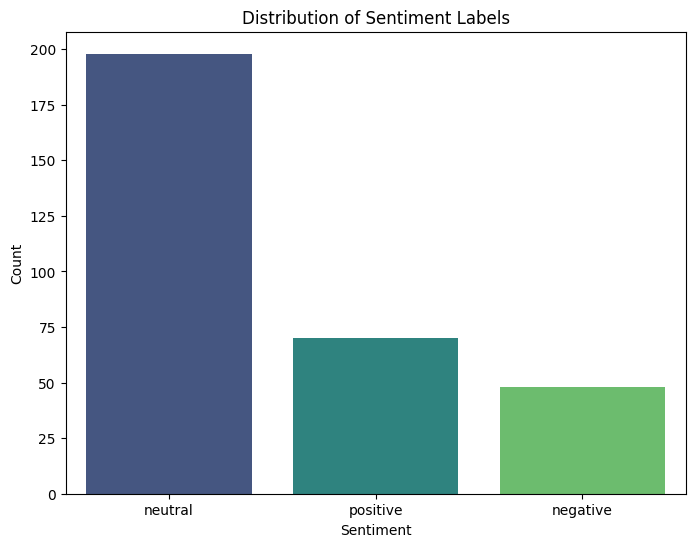

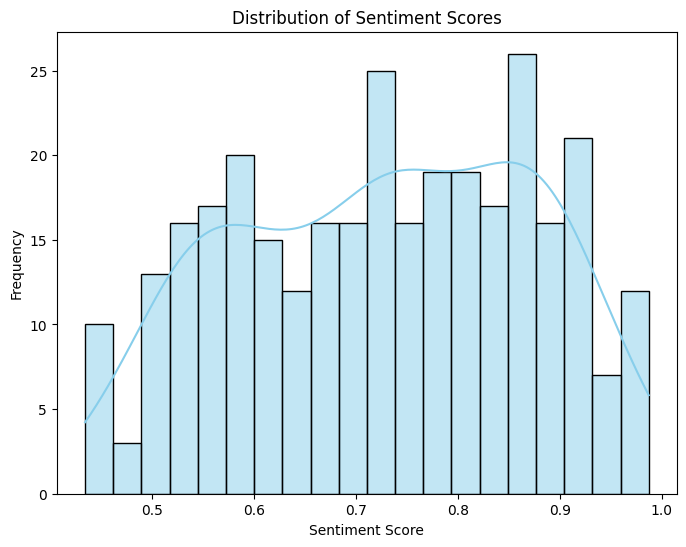

In [48]:
plot_sentiment_distribution(sentiments_cardiffnlp, scores_cardiffnlp)

### lxyuan/distilbert-base-multilingual-cased-sentiments-student

Overall average sentiment score: 0.5670

Average sentiment score by sentiment type:


,score
sentiment,
negative,0.523247
neutral,0.446239
positive,0.621995


/tmp/ipython-input-1195476696.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=sentiment_df, palette='viridis')


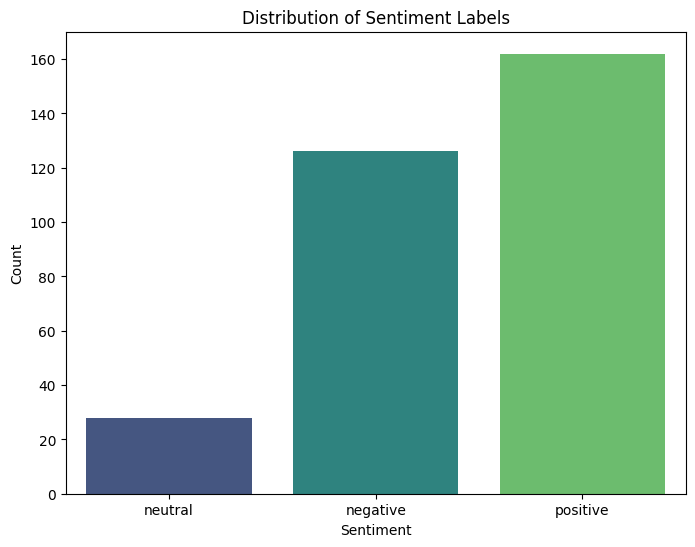

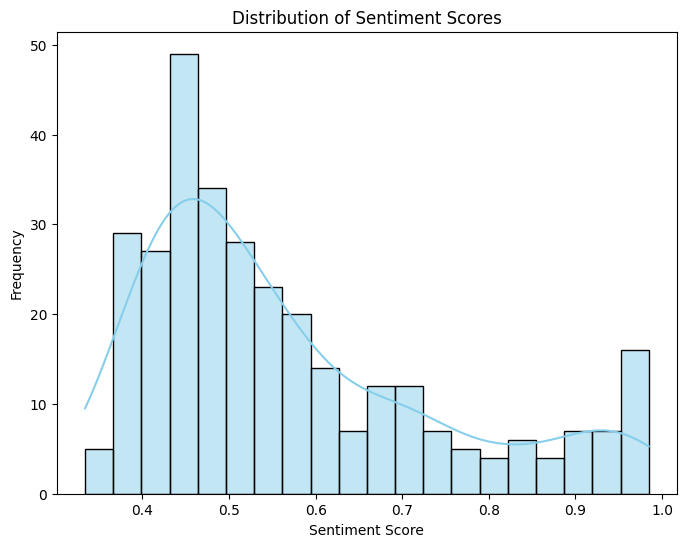

In [49]:
plot_sentiment_distribution(sentiments_lxyuan, scores_lxyuan)

### nlptown/bert-base-multilingual-uncased-sentiment

Overall average sentiment score: 0.4111

Average sentiment score by sentiment type:


,score
sentiment,
1 star,0.411956
2 stars,0.392456
3 stars,0.407614
4 stars,0.384360
5 stars,0.457889


/tmp/ipython-input-1195476696.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=sentiment_df, palette='viridis')


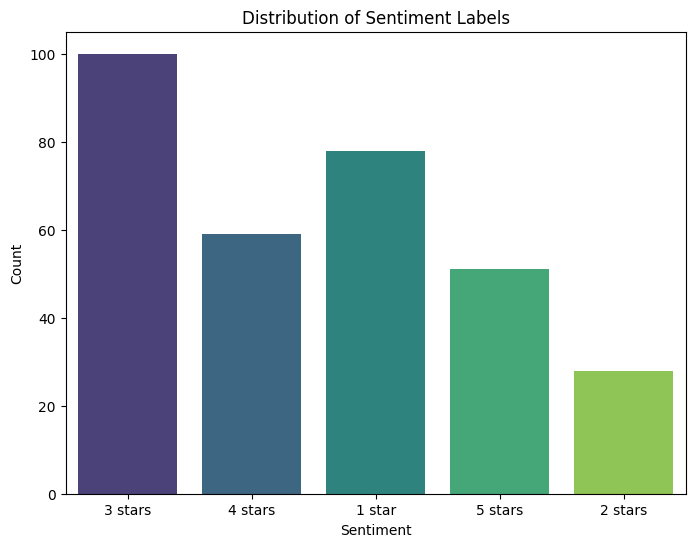

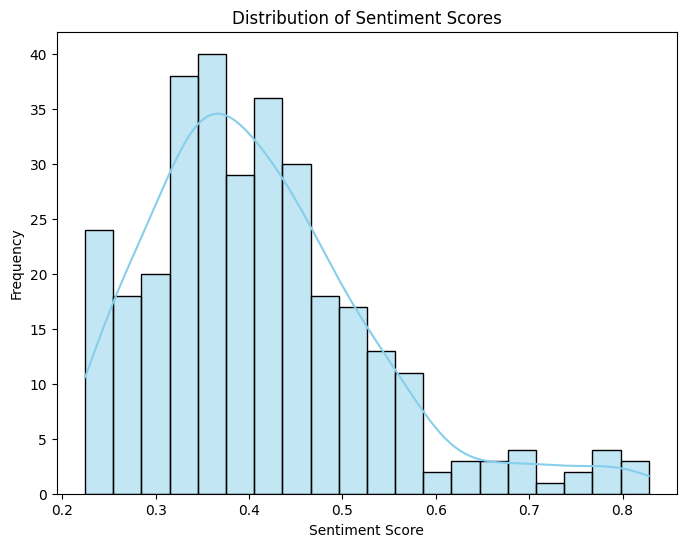

In [50]:
plot_sentiment_distribution(sentiments_nlptown, scores_nlptown)

OBS: Tem que trocar esse ultimo modelo, ele classifica de forma diferente.